# Project 1 Mercedez - Submitted by Monica

### Load necessary modules

In [94]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_rows = 400

### Read the input file

In [71]:
data=pd.read_csv('train.csv')

In [53]:
data.shape

(4209, 378)

### The shape of the input is 4209 (rows) and 378 (variables)

In [54]:
#get the column ids
data.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [95]:
#check if there is any NA values
data.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
X37     0
X38     0
X39     0
X40     0
X41     0
X42     0
X43     0
X44     0
X45     0
X46     0
X47     0
X48     0
X49     0
X50     0
X51     0
X52     0
X53     0
X54     0
X55     0
X56     0
X57     0
X58     0
X59     0
X60     0
X61     0
X62     0
X63     0
X64     0
X65     0
X66     0
X67     0
X68     0
X69     0
X70     0
X71     0
X73     0
X74     0
X75     0
X76     0
X77     0
X78     0
X79     0
X80     0
X81     0
X82     0
X83     0
X84     0
X85     0
X86     0
X87     0
X88     0
X89     0
X90     0
X91     0
X92     0
X93     0
X94     0
X95     0
X96     0
X97     0
X98     0
X99     0
X100    0
X101    0


### No missing values in the data isna returns false for all the columns

In [6]:
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Comments
The data is divided into X which consists of all variables and y the output time

In [72]:
X=data.iloc[:,2:]
y=data.iloc[:,1]
y.head()
X.shape

(4209, 376)

### Comments
Since the dependant parameter y is the time required to finish the car,  the categorical variables are removed

In [73]:
#select categorical values
X_categorical_features = X.select_dtypes(include='object')
X_categorical_features.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

X0-X8 are the categorical variables

In [74]:
X.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis='columns', inplace=True)

After dropping the categorocal variables the number of  columns/variables is 368

In [75]:
len(X.columns)

368

In [112]:
#to check how many columns are there with zero variance
(X.var()==0).value_counts()

False    356
dtype: int64

### Comments
Accessing the variance of the data set, it is found that 12 columns have zero values. i.e. 12 columns have constant numbers in them. Such variables do not give information about the dependant variable. Hence, it is removed.

In [77]:
X_temp=X.copy()

In [80]:
# to drop the columns with zero variance
drop_col_name=[]
for i in range (1,368): 
  
    if (X_temp.iloc[:,i].var() == 0.0):
        drop_col_name.append(X_temp.columns[i])
        X.drop(columns = X_temp.columns[i], axis=1,  inplace=True)
       


In [113]:
#drop_col_name gives the name of the columns that are dropped with zero variance. It is recorded because the same columns are dropped in test data for consistency
drop_col_name

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [62]:
X.shape

(4209, 356)

### Comments
The columns with zero variances are removed

In [16]:
#X.loc[:, (X != X.iloc[0]).any()] 

In [63]:
# Applying scaling technique for numerical data of train set
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax = MinMaxScaler()
X_Scaled = minmax.fit_transform(X)
X_Scaled.shape

(4209, 356)

# Dimension reduction

The data consists of huge number of columns and hence PCA is attempted to check if dimensional reduction is possible

In [84]:
#import PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=356)

In [85]:
pca.fit(X_Scaled)

PCA(n_components=356)

In [86]:
X_pca=pca.transform(X_Scaled)

In [87]:
pca.explained_variance_ratio_*100

array([1.30754626e+01, 8.89590436e+00, 8.60880768e+00, 6.84815655e+00,
       5.77522231e+00, 4.80324284e+00, 3.83903404e+00, 3.29579191e+00,
       2.81083444e+00, 2.50934246e+00, 2.35491229e+00, 1.97462569e+00,
       1.70329590e+00, 1.65897379e+00, 1.54621991e+00, 1.48001952e+00,
       1.39528017e+00, 1.22062433e+00, 1.04062613e+00, 1.02212934e+00,
       9.79087219e-01, 8.90636574e-01, 8.85120054e-01, 8.30483829e-01,
       8.03174989e-01, 7.43509681e-01, 7.33212462e-01, 6.51819526e-01,
       6.18282884e-01, 5.84653371e-01, 5.31907626e-01, 5.09226901e-01,
       4.71843219e-01, 4.62325162e-01, 4.40977167e-01, 4.21579121e-01,
       4.15107690e-01, 4.04883162e-01, 3.90536812e-01, 3.60970384e-01,
       3.55434546e-01, 3.43368406e-01, 3.38189454e-01, 3.23800534e-01,
       3.16568722e-01, 2.99818355e-01, 2.84820924e-01, 2.81650174e-01,
       2.63397156e-01, 2.60254692e-01, 2.54267787e-01, 2.41672411e-01,
       2.38163854e-01, 2.28854420e-01, 2.17743624e-01, 2.07341583e-01,
      

Text(0, 0.5, 'Cumulative percentage of variance')

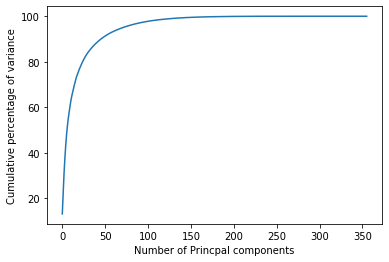

In [88]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of Princpal components')
plt.ylabel('Cumulative percentage of variance')

### Comments
Plotting the explained ratio vs the number of principal components, we can see that an optimum of 60 principal components are enough to explain about 94% of data. Hence 60 Principal components are used for further analysis


In [114]:
from sklearn.decomposition import PCA
pca=PCA(n_components=60)
pca.fit(X_Scaled)
X_pca=pca.transform(X_Scaled)


In [90]:
np.cumsum(pca.explained_variance_ratio_*100)

array([13.07546259, 21.97136695, 30.58017463, 37.42833119, 43.2035535 ,
       48.00679634, 51.84583038, 55.14162229, 57.95245672, 60.46179919,
       62.81671147, 64.79133717, 66.49463307, 68.15360686, 69.69982677,
       71.17984629, 72.57512645, 73.79575078, 74.83637689, 75.85850623,
       76.83759343, 77.72822994, 78.61334998, 79.44383372, 80.24700864,
       80.99051818, 81.72373026, 82.37554916, 82.99383151, 83.57848444,
       84.11039017, 84.61961376, 85.09144808, 85.5537701 , 85.99474112,
       86.41631078, 86.83139789, 87.23626538, 87.62678763, 87.98772801,
       88.34307666, 88.68630123, 89.02442101, 89.34810756, 89.66449624,
       89.9641788 , 90.24877251, 90.53017601, 90.79333872, 91.05319481,
       91.30701459, 91.54824805, 91.78589811, 92.01409085, 92.23152864,
       92.43717072, 92.63951075, 92.83353095, 93.02110552, 93.19688039])

PCA with 60 components can explain 93 % of the variance in the data

### Comments
For the reduced data, the regression is performed using XGboost regressor

In [115]:
# fitting xgbregressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

xgb=XGBRegressor()

#fit the model on the training data set
xgb.fit(X_pca,y)
prediction_train=xgb.predict(X_pca)

print('MAE Train : %0.3f' %mean_squared_error(y, prediction_train))
print('R2 score Train : %0.3f' %r2_score(y, prediction_train))


MAE Train : 22.926
R2 score Train : 0.857


### Comments
Since the data is continous in nature, the mean square error and R2 score is used as an estimate of model performance.
The trained model gives an MAE of 23 and R2score of 0.857

In [26]:
# To optimise max_depth
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

R2_Score_maxdepth= []
for i in range(1,50):
    xgb=XGBRegressor(max_depth=i, learning_rate=0.4)
#fit the model on the training data set
    xgb.fit(X_pca,y)
    prediction_train=xgb.predict(X_pca)
    R2_Score_maxdepth.append(r2_score(y, prediction_train))
    

### Comments
The above code aims to optimsie two parameters namely max_depth and learning_rate.
First max_depth is optimised by running the model for various max depth values ranging from 1-50

Text(0, 0.5, 'R2_Score')

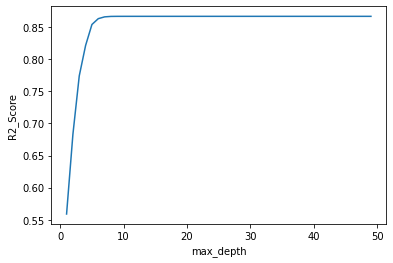

In [27]:
plt.plot(range(1,50),R2_Score_maxdepth)
plt.xlabel('max_depth')
plt.ylabel('R2_Score')

### Comments
Plotting the R2 score with the max_depth parameters it can be concluded that an optimal max_depth is around 6 above which there is no further improvement in the model

In [28]:
# To optimise learning_Rate

R2_Score_learningrate= []
for i in range(1,20):
    xgb=XGBRegressor(max_depth=6, learning_rate=0.05*i)
#fit the model on the training data set
    xgb.fit(X_pca,y)
    prediction_train=xgb.predict(X_pca)
    R2_Score_learningrate.append(r2_score(y, prediction_train))

### Comments
For the optimised max depth that is 6, the learning rate is optimsied in a similar way. the curve between the learning rate and r2score suggest that an optimal learning rate is around 0.4

Text(0, 0.5, 'R2_Score')

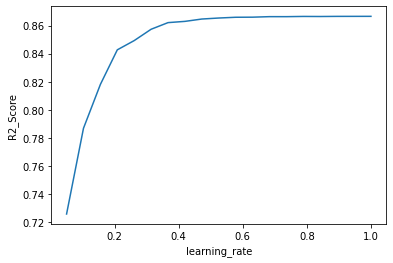

In [30]:

plt.plot(np.linspace(0.05,1,19),R2_Score_learningrate)
plt.xlabel('learning_rate')
plt.ylabel('R2_Score')

### Final model

In [33]:
xgb=XGBRegressor(max_depth=6, learning_rate=0.4)
#fit the model on the training data set
xgb.fit(X_pca,y)
prediction_train=xgb.predict(X_pca)
r2_score(y, prediction_train)


0.8630103374623566

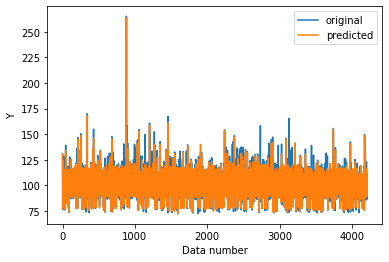

In [120]:
x_ax = range(len(y))
plt.plot(x_ax, y, label="original")
plt.plot(x_ax, prediction_train, label="predicted")
plt.xlabel('Data number')
plt.ylabel('Y')
plt.legend()

The above plot shows the comparison of the train data and the predicted data

# Test data prediction

To predict the test data we need to apply PCA transformation and all the preprocessing applied to train data first.

In [101]:
data_test=pd.read_csv('test.csv')

In [102]:
X_test=data_test.iloc[:,1:]
X_test.shape

(4209, 376)

In [103]:
data.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
X37     0
X38     0
X39     0
X40     0
X41     0
X42     0
X43     0
X44     0
X45     0
X46     0
X47     0
X48     0
X49     0
X50     0
X51     0
X52     0
X53     0
X54     0
X55     0
X56     0
X57     0
X58     0
X59     0
X60     0
X61     0
X62     0
X63     0
X64     0
X65     0
X66     0
X67     0
X68     0
X69     0
X70     0
X71     0
X73     0
X74     0
X75     0
X76     0
X77     0
X78     0
X79     0
X80     0
X81     0
X82     0
X83     0
X84     0
X85     0
X86     0
X87     0
X88     0
X89     0
X90     0
X91     0
X92     0
X93     0
X94     0
X95     0
X96     0
X97     0
X98     0
X99     0
X100    0
X101    0


No nan values in test data too

In [104]:
X_test_categorical_features = X_test.select_dtypes(include='object')
X_test_categorical_features.columns
X_test.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis='columns', inplace=True)


In [105]:
#Drop the same columns that were dropped in train data with zero variance
X_test.drop(drop_col_name, axis='columns', inplace=True)

In [106]:
X_test.shape

(4209, 356)

In [107]:
# Applying scaling technique for numerical data of train set
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax = MinMaxScaler()
X_test_Scaled = minmax.fit_transform(X_test)
X_test_Scaled.shape

(4209, 356)

In [108]:
#Applying PCA with 60 parameters as in Train set
from sklearn.decomposition import PCA
pca=PCA(n_components=60)
pca.fit(X_test_Scaled)
X_test_pca=pca.transform(X_test_Scaled)


### Final model

The fitted model of xgboost is again used to predict the test data

In [122]:
xgb=XGBRegressor(max_depth=6, learning_rate=0.4)
#fit the model on the training data set
xgb.fit(X_pca,y)
prediction_train=xgb.predict(X_pca)
print('R2 score Train : %0.3f' %r2_score(y, prediction_train))

prediction_test=xgb.predict(X_test_pca)

R2 score Train : 0.863


In [111]:
# Create a submission file
submission = pd.DataFrame({'ID': data_test['ID'], 'y': prediction_test})

# Save the submission file
submission.to_csv('submission.csv', index=False)